<H1 align="center"> City Of Gold Mumbai </H1>

In [1]:
!conda install -c conda-forge folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0        

In [2]:
!pip install bs4
!pip install pmdarima
!pip install yellowbrick
!pip install config

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=63fa780c716cd085503ef169f11cb4ab5aad7c01c62dbffcfaa9280bc31f7e1b
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
     |████████████████████████████████| 1.5 MB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 63.3 MB/s eta 0:00:01
     |████████████████████████████████| 271 kB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 57.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2


In [21]:
!pip install -c conda-forge imbalanced-learn
!pip conda install nb_conda 

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'
ERROR: unknown command "conda"


In [22]:
!pip install delayed

In [10]:
# For numerical data and dataframe handling
import numpy as np 
import pandas as pd 

# For web scraping data
from bs4 import BeautifulSoup
import requests

# For obtaining coordinates from Location
from geopy.geocoders import Nominatim 

# For reading url resutls
import requests 

# For clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# For creating Maps & Visualizations
import folium 
import matplotlib.pyplot as plt

# Local file containing API keys
import config

# For preprocessing data collected
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# For understanding JSON files
from pandas.io.json import json_normalize
import json

print('Libraries imported.')

Libraries imported.


In [11]:
WIKI_URL = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai"

dfs = pd.read_html(WIKI_URL, header=0) # set header with row #0
dfs

[                Area                 Location   Latitude  Longitude
 0             Amboli  Andheri,Western Suburbs  19.129300  72.843400
 1   Chakala, Andheri          Western Suburbs  19.111388  72.860833
 2         D.N. Nagar  Andheri,Western Suburbs  19.124085  72.831373
 3     Four Bungalows  Andheri,Western Suburbs  19.124714  72.827210
 4        Lokhandwala  Andheri,Western Suburbs  19.130815  72.829270
 ..               ...                      ...        ...        ...
 88             Parel             South Mumbai  18.990000  72.840000
 89      Gowalia Tank      Tardeo,South Mumbai  18.962450  72.809703
 90       Dava Bazaar             South Mumbai  18.946882  72.831362
 91           Dharavi                   Mumbai  19.040208  72.850850
 92             Thane                   Mumbai  19.200000  72.970000
 
 [93 rows x 4 columns]]

In [12]:
df=dfs[0]

In [13]:
df

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000
89,Gowalia Tank,"Tardeo,South Mumbai",18.962450,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.850850


In [14]:
from geopy.geocoders import Nominatim

In [15]:
address = 'mumbai, maharashtra'

geolocator = Nominatim(user_agent="mumbai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of mumbai are {}, {}.'.format(latitude, longitude))

The coordinates of mumbai are 19.0759899, 72.8773928.


In [16]:
# Creating the map of Mumbai
map_Mumbai = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for latitude, longitude, Area, Location in zip(df['Latitude'], df['Longitude'], df['Area'], df['Location']):
    label = '{}, {}'.format(Area, Location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_Mumbai)  
    
map_Mumbai

In [17]:
CLIENT_ID = 'O1LW2JUKJUJYE2ODTTVL2UPKT0URN45ZPDCHKIS0KY3OGMDC' 
CLIENT_SECRET = 'RMTYY4NRDXGY04EQNZFI2IQ0SFNICO11XFLPYJB4OJQDLZTU'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)  

Your credentails:
CLIENT_ID: O1LW2JUKJUJYE2ODTTVL2UPKT0URN45ZPDCHKIS0KY3OGMDC
CLIENT_SECRET:RMTYY4NRDXGY04EQNZFI2IQ0SFNICO11XFLPYJB4OJQDLZTU


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
venues_in_Mumbai = getNearbyVenues(df['Area'], df['Latitude'], df['Longitude'])

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


In [22]:
venues_in_Mumbai.shape

(2119, 5)

In [23]:
venues_in_Mumbai.head()

,Neighborhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Amboli,19.1293,72.8434,Shawarma Factory,Falafel Restaurant
1,Amboli,19.1293,72.8434,Cafe Arfa,Indian Restaurant
2,Amboli,19.1293,72.8434,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant
3,Amboli,19.1293,72.8434,"5 Spice , Bandra",Chinese Restaurant
4,Amboli,19.1293,72.8434,Pizza Express,Pizza Place


In [24]:
venues_in_Mumbai.groupby('Neighborhood').head()

,Neighborhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Amboli,19.1293,72.8434,Shawarma Factory,Falafel Restaurant
1,Amboli,19.1293,72.8434,Cafe Arfa,Indian Restaurant
2,Amboli,19.1293,72.8434,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant
3,Amboli,19.1293,72.8434,"5 Spice , Bandra",Chinese Restaurant
4,Amboli,19.1293,72.8434,Pizza Express,Pizza Place
...,...,...,...,...,...
2089,Thane,19.2000,72.9700,Mad Over Donuts,Donut Shop
2090,Thane,19.2000,72.9700,Starbucks,Coffee Shop
2091,Thane,19.2000,72.9700,Food Court,Food Court
2092,Thane,19.2000,72.9700,Korum Mall,Shopping Mall


In [25]:
venues_in_Mumbai.groupby('Neighborhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
Neighborhood,,,,
Aarey Milk Colony,8,8,8,8
Agripada,26,26,26,26
Altamount Road,30,30,30,30
Amboli,30,30,30,30
Amrut Nagar,30,30,30,30
...,...,...,...,...
Vikhroli,5,5,5,5
Vile Parle,30,30,30,30
Virar,7,7,7,7


## Unique Venue In Mumbai

In [26]:
print('There are {} uniques categories.'.format(len(venues_in_Mumbai['Venue Category'].unique())))

There are 187 uniques categories.


## We now create another dataframe, one hot encoding all neighborhood venues

In [27]:
#One hot encoding
mumbai_onehot = pd.get_dummies(venues_in_Mumbai[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe as neighbor
mumbai_onehot['Neighbor'] = venues_in_Mumbai['Neighborhood'] 

# Move neighbor column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighbor,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,...,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
mumbai_grouped = mumbai_onehot.groupby('Neighbor').mean().reset_index()
mumbai_grouped

,Neighbor,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,...,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo
0,Aarey Milk Colony,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,Agripada,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.038462,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.038462
2,Altamount Road,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.000000
3,Amboli,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.033333,0.033333,0.000000,0.0,0.0,0.000000
4,Amrut Nagar,0.033333,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.033333,...,0.0,0.0,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Vikhroli,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
86,Vile Parle,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
87,Virar,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
88,Walkeshwar,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [29]:
# Function to return most common venues for a neighborhood
def common_venues(row, num_of_top):
    
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_of_top]

In [30]:
# Number of top venues required
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for indx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(indx+1, indicators[indx]))
    except:
        columns.append('{}th Most Common Venue'.format(indx+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighbor']

for indx in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[indx, 1:] = common_venues(mumbai_grouped.iloc[indx, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Milk Colony,Resort,Café,Hotel,Gym / Fitness Center,Indian Restaurant,Farm,Golf Course,Restaurant,Modern European Restaurant,Monument / Landmark
1,Agripada,Indian Restaurant,Bakery,Gym,Coffee Shop,History Museum,Club House,Tea Room,Platform,Pizza Place,Pharmacy
2,Altamount Road,Bakery,Café,Chinese Restaurant,History Museum,Bookstore,Brewery,Sandwich Place,Salon / Barbershop,Restaurant,Deli / Bodega
3,Amboli,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Pub,Chinese Restaurant,Bowling Alley,Burger Joint,Mughlai Restaurant,Snack Place
4,Amrut Nagar,Indian Restaurant,Lounge,Clothing Store,Fast Food Restaurant,Diner,Afghan Restaurant,Coffee Shop,Brewery,Shopping Mall,Café


## After creating the above dataframe we now try to discover the amenities in each neighborhood. We use the HERE API's free-text query feature for this category search.

In [31]:
neighborhood_amenities = df[['Area','Latitude','Longitude']]
neighborhood_amenities.head()

,Area,Latitude,Longitude
0,Amboli,19.129300,72.843400
1,"Chakala, Andheri",19.111388,72.860833
2,D.N. Nagar,19.124085,72.831373
3,Four Bungalows,19.124714,72.827210
4,Lokhandwala,19.130815,72.829270


## After creating the above dataframe we now try to discover the amenities in each neighborhood. We use the HERE API's free-text query feature for this category search.

In [32]:
# Function to find the number of different facilities by category in each neighborhood
def find_amenities(df, category):
    
    category_amnt = []
    
    for name, lat, long in zip(df['Area'], df['Latitude'], df['Longitude']):
        
        print(name)
        radius=1500 # Limit search to 1km
        limit=100   # Limit to 100 results
       
        # Create API request URL
        url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&limit={}&q={}&apiKey=WuT5Q9aoBauXZ_gxa6x4nvPy646MUEiZC_oTlHdeIxA'.format(
            lat, 
            long, 
            radius, 
            limit, 
            category, 
            )    
        
        # Make the GET request
        results = len(requests.get(url).json()["items"])
        category_amnt.append(results)
    return category_amnt

In [33]:
# Function call to find the number of hospitals in each neighborhood
hospitals = find_amenities(df,'hospital')
hospitals

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


[30,
 16,
 22,
 17,
 19,
 14,
 5,
 13,
 7,
 48,
 32,
 3,
 2,
 14,
 11,
 24,
 0,
 35,
 1,
 14,
 21,
 9,
 30,
 42,
 31,
 22,
 16,
 20,
 16,
 33,
 22,
 2,
 4,
 2,
 18,
 9,
 30,
 9,
 38,
 36,
 11,
 0,
 29,
 11,
 4,
 5,
 35,
 13,
 35,
 29,
 9,
 0,
 14,
 16,
 14,
 11,
 18,
 13,
 3,
 7,
 1,
 11,
 21,
 9,
 3,
 6,
 12,
 19,
 4,
 15,
 2,
 7,
 7,
 22,
 3,
 18,
 17,
 2,
 7,
 12,
 14,
 1,
 0,
 8,
 11,
 12,
 20,
 29,
 16,
 17,
 8,
 18,
 89]

In [34]:
# Function call to find the number of schools in each neighborhood
schools = find_amenities(df,'school')
schools

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


[100,
 87,
 100,
 89,
 96,
 54,
 34,
 55,
 51,
 89,
 66,
 5,
 7,
 73,
 87,
 81,
 1,
 100,
 4,
 54,
 100,
 71,
 100,
 100,
 100,
 68,
 98,
 100,
 80,
 100,
 100,
 11,
 18,
 18,
 100,
 71,
 100,
 61,
 100,
 100,
 54,
 21,
 100,
 66,
 53,
 41,
 100,
 74,
 100,
 100,
 93,
 0,
 100,
 100,
 100,
 100,
 100,
 100,
 23,
 81,
 21,
 100,
 100,
 100,
 5,
 52,
 100,
 100,
 3,
 84,
 22,
 100,
 100,
 100,
 38,
 100,
 100,
 20,
 59,
 100,
 100,
 15,
 0,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [35]:
# Function call to find the number of emergency services in each neighborhood
emergency_services = find_amenities(df,'emergency')
emergency_services

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


[13,
 10,
 9,
 8,
 8,
 9,
 9,
 2,
 6,
 6,
 4,
 0,
 2,
 12,
 7,
 8,
 1,
 11,
 1,
 6,
 14,
 8,
 5,
 10,
 8,
 5,
 13,
 16,
 10,
 10,
 15,
 2,
 1,
 0,
 14,
 8,
 8,
 5,
 11,
 16,
 10,
 0,
 8,
 4,
 4,
 4,
 13,
 7,
 18,
 15,
 12,
 0,
 31,
 16,
 42,
 12,
 15,
 36,
 8,
 20,
 3,
 14,
 23,
 31,
 0,
 21,
 14,
 17,
 1,
 15,
 2,
 26,
 28,
 34,
 11,
 13,
 14,
 2,
 13,
 20,
 32,
 3,
 0,
 36,
 33,
 38,
 46,
 27,
 23,
 22,
 38,
 16,
 25]

In [36]:
# Function call to find the number of leisure facilities in each neighborhood
leisure = find_amenities(df,'leisure')
leisure

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


[58,
 39,
 61,
 60,
 70,
 27,
 16,
 50,
 38,
 34,
 21,
 9,
 19,
 59,
 52,
 59,
 3,
 67,
 6,
 35,
 44,
 39,
 43,
 59,
 68,
 43,
 60,
 48,
 31,
 56,
 36,
 3,
 3,
 4,
 58,
 39,
 21,
 53,
 54,
 79,
 25,
 2,
 34,
 49,
 49,
 19,
 65,
 36,
 57,
 38,
 19,
 0,
 54,
 71,
 60,
 68,
 49,
 53,
 28,
 43,
 31,
 73,
 63,
 46,
 7,
 46,
 69,
 63,
 11,
 45,
 29,
 47,
 49,
 60,
 41,
 62,
 57,
 28,
 36,
 54,
 55,
 15,
 0,
 27,
 58,
 60,
 61,
 95,
 51,
 82,
 47,
 42,
 90]

In [37]:
# Function call to find the number of shopping facilties in each neighborhood
shopping = find_amenities(df, 'shopping')
shopping

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 0,
 41,
 100,
 100,
 100,
 1,
 100,
 10,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 8,
 38,
 64,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 18,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 0,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 71,
 100,
 100,
 100,
 0,
 100,
 100,
 100,
 100,
 100,
 80,
 100,
 100,
 100,
 100,
 100,
 100,
 76,
 100,
 100,
 100,
 18,
 0,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [38]:
# Function call to find the number of Banks in each neighborhood
Bank = find_amenities(df, 'Bank')
Bank

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


[100,
 100,
 100,
 100,
 100,
 100,
 61,
 90,
 81,
 97,
 71,
 5,
 29,
 100,
 100,
 100,
 1,
 100,
 1,
 76,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 93,
 100,
 100,
 12,
 13,
 11,
 100,
 100,
 100,
 90,
 100,
 100,
 69,
 3,
 100,
 73,
 89,
 46,
 100,
 61,
 100,
 100,
 22,
 0,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 66,
 100,
 100,
 100,
 5,
 100,
 100,
 100,
 26,
 100,
 40,
 100,
 100,
 100,
 100,
 100,
 100,
 37,
 100,
 100,
 100,
 19,
 0,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [39]:
# Function call to find the number of Cinemas in each neighborhood
Cinema = find_amenities(df, 'Cinema')
Cinema

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


[15,
 10,
 22,
 19,
 20,
 1,
 2,
 1,
 7,
 5,
 5,
 0,
 4,
 26,
 12,
 2,
 0,
 4,
 0,
 7,
 7,
 7,
 0,
 3,
 4,
 14,
 27,
 20,
 5,
 12,
 6,
 0,
 0,
 0,
 17,
 7,
 14,
 5,
 9,
 10,
 4,
 0,
 11,
 2,
 1,
 5,
 18,
 1,
 11,
 8,
 0,
 0,
 14,
 24,
 39,
 11,
 12,
 33,
 16,
 12,
 1,
 19,
 23,
 19,
 0,
 31,
 24,
 23,
 0,
 7,
 1,
 25,
 29,
 49,
 19,
 17,
 9,
 1,
 12,
 14,
 13,
 1,
 0,
 13,
 47,
 49,
 53,
 34,
 14,
 41,
 25,
 10,
 28]

In [40]:
# Add compiled amenities data to the dataframe
neighborhood_amenities['Hospitals'] = hospitals
neighborhood_amenities['Schools'] = schools
neighborhood_amenities['Emergency Services'] = emergency_services
neighborhood_amenities['Leisure'] = leisure
neighborhood_amenities['Shopping Facilities'] = shopping
neighborhood_amenities['Banks'] = Bank
neighborhood_amenities['Cinemas'] = Cinema
neighborhood_amenities.head()

,Area,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas
0,Amboli,19.129300,72.843400,30,100,13,58,100,100,15
1,"Chakala, Andheri",19.111388,72.860833,16,87,10,39,100,100,10
2,D.N. Nagar,19.124085,72.831373,22,100,9,61,100,100,22
3,Four Bungalows,19.124714,72.827210,17,89,8,60,100,100,19
4,Lokhandwala,19.130815,72.829270,19,96,8,70,100,100,20


In [41]:
neighborhood_amenities = neighborhood_amenities.rename(columns={'Area': 'Neighborhood'})

In [42]:
final_df = pd.merge(neighborhood_amenities, neighborhoods_venues_sorted, on='Neighborhood')
final_df.head()

,Neighborhood,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,19.129300,72.843400,30,100,13,58,100,100,15,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Pub,Chinese Restaurant,Bowling Alley,Burger Joint,Mughlai Restaurant,Snack Place
1,"Chakala, Andheri",19.111388,72.860833,16,87,10,39,100,100,10,Hotel,Café,Seafood Restaurant,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant
2,D.N. Nagar,19.124085,72.831373,22,100,9,61,100,100,22,Bar,Pub,Pizza Place,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Café,Residential Building (Apartment / Condo),Lounge,Liquor Store,Coffee Shop
3,Four Bungalows,19.124714,72.827210,17,89,8,60,100,100,19,Pub,Café,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Gym / Fitness Center,Bar,Juice Bar,Chinese Restaurant,Residential Building (Apartment / Condo)
4,Lokhandwala,19.130815,72.829270,19,96,8,70,100,100,20,Pub,Italian Restaurant,Café,Multiplex,Lounge,Juice Bar,Bar,Pizza Place,Indian Restaurant,Women's Store


In [43]:
# Check data types of the different columns
final_df.dtypes

Neighborhood               object
Latitude                  float64
Longitude                 float64
Hospitals                   int64
Schools                     int64
Emergency Services          int64
Leisure                     int64
Shopping Facilities         int64
Banks                       int64
Cinemas                     int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [44]:
final_df.to_csv('Mumbai Neighborhood Data.csv')

In [45]:
# Remove 'Nieghborhood' and coordinates as they are not required for clustering
clustering_df = final_df.drop(columns=['Neighborhood','Latitude','Longitude'])
clustering_df.head()

,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30,100,13,58,100,100,15,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Pub,Chinese Restaurant,Bowling Alley,Burger Joint,Mughlai Restaurant,Snack Place
1,16,87,10,39,100,100,10,Hotel,Café,Seafood Restaurant,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant
2,22,100,9,61,100,100,22,Bar,Pub,Pizza Place,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Café,Residential Building (Apartment / Condo),Lounge,Liquor Store,Coffee Shop
3,17,89,8,60,100,100,19,Pub,Café,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Gym / Fitness Center,Bar,Juice Bar,Chinese Restaurant,Residential Building (Apartment / Condo)
4,19,96,8,70,100,100,20,Pub,Italian Restaurant,Café,Multiplex,Lounge,Juice Bar,Bar,Pizza Place,Indian Restaurant,Women's Store


In [46]:
# Scale the first 6 columns (numerical data) for better results and store it in scaled_data
scaled_data = clustering_df.copy()
col = list(clustering_df.columns)[:7]
features = scaled_data[col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

## Our final dataframe will now be created. It will consist of scaled numerical data for amenities and also populaur venues described by their commonnness.

In [47]:
mumbai_clustering = mumbai_grouped.drop('Neighbor', 1)

In [48]:
mumbai_clustering[col] = scaled_data[col]

In [49]:
print(mumbai_clustering.shape)
mumbai_clustering.head() # Find shape of final dataframe

(90, 194)


,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,...,Wine Shop,Women's Store,Zoo,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,30,100,13,58,100,100,15
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.038462,0.0,...,0.0,0.0,0.038462,16,87,10,39,100,100,10
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,22,100,9,61,100,100,22
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667,0.0,...,0.0,0.0,0.000000,17,89,8,60,100,100,19
4,0.033333,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.033333,0.0,...,0.0,0.0,0.000000,19,96,8,70,100,100,20


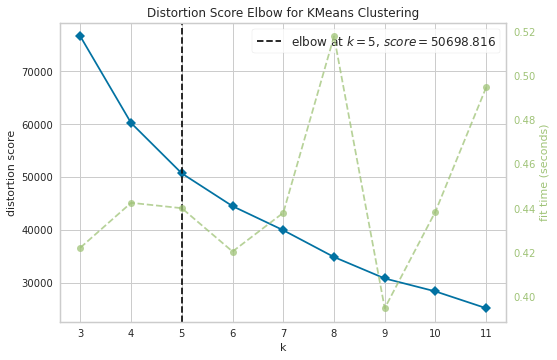

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(3,12)) # Check for optimal clusters between 3-12

visualize.fit(mumbai_clustering)        # Fit the data 
visualize.show()

## The above plot shows us the distortion score and fit time for each value of k.
## The ideal value of k is found to be 5. We proceed to fit our data with 5 clusters.

In [52]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(mumbai_clustering)

In [53]:
# Insert the cluster labels for each neighborhood into the final dataframe, final_df
final_df.insert(0, 'Cluster Labels', kmeans.labels_)
final_df.head()

,Cluster Labels,Neighborhood,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Amboli,19.129300,72.843400,30,100,13,58,100,100,...,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Pub,Chinese Restaurant,Bowling Alley,Burger Joint,Mughlai Restaurant,Snack Place
1,3,"Chakala, Andheri",19.111388,72.860833,16,87,10,39,100,100,...,Hotel,Café,Seafood Restaurant,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant
2,3,D.N. Nagar,19.124085,72.831373,22,100,9,61,100,100,...,Bar,Pub,Pizza Place,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Café,Residential Building (Apartment / Condo),Lounge,Liquor Store,Coffee Shop
3,3,Four Bungalows,19.124714,72.827210,17,89,8,60,100,100,...,Pub,Café,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Gym / Fitness Center,Bar,Juice Bar,Chinese Restaurant,Residential Building (Apartment / Condo)
4,3,Lokhandwala,19.130815,72.829270,19,96,8,70,100,100,...,Pub,Italian Restaurant,Café,Multiplex,Lounge,Juice Bar,Bar,Pizza Place,Indian Restaurant,Women's Store


In [54]:
#Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for each cluster
colors= ['#2E86C1', '#FCC3B6', '#FF007C', '#8CEF42', '#FBF427', '#5DADE2', '#D337D2']

# Add markers to the map
for lat, lon, poi, cluster in zip(final_df['Latitude'], final_df['Longitude'], final_df['Neighborhood'], final_df['Cluster Labels']):
    
    label = folium.Popup(str(poi) + ' ,Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.85).add_to(map_clusters)
# Display map
map_clusters

In [55]:
# Print the neighborhood and their details, belonging to Cluster 1
cluster1 = final_df.loc[final_df['Cluster Labels'] == 0, final_df.columns[[1] + list(range(2, final_df.shape[1]))]]
cluster1.head()

,Neighborhood,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Pali Naka,19.062742,72.829396,16,98,13,60,100,100,27,Indian Restaurant,Seafood Restaurant,Dessert Shop,Arcade,Deli / Bodega,Asian Restaurant,Bakery,Salad Place,Café,Gym / Fitness Center
50,Agripada,18.977700,72.827300,14,100,31,54,100,100,14,Indian Restaurant,Bakery,Gym,Coffee Shop,History Museum,Club House,Tea Room,Platform,Pizza Place,Pharmacy
51,Altamount Road,18.968100,72.809500,16,100,16,71,100,100,24,Bakery,Café,Chinese Restaurant,History Museum,Bookstore,Brewery,Sandwich Place,Salon / Barbershop,Restaurant,Deli / Bodega
52,Bhuleshwar,18.950000,72.830000,14,100,42,60,100,100,39,Indian Restaurant,Fast Food Restaurant,Café,Bakery,Ice Cream Shop,Market,Electronics Store,Restaurant,Coffee Shop,Chinese Restaurant
55,Cavel,18.947400,72.827200,13,100,36,53,100,100,33,Indian Restaurant,Cricket Ground,Café,Fast Food Restaurant,Bakery,Restaurant,Food Truck,Scenic Lookout,Food,Music Store


In [56]:
# Create Map for Cluster 1 neighborhoods

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to the map
markers_colors = []
for lat, lon, poi in zip(cluster1['Latitude'], cluster1['Longitude'], cluster1['Neighborhood']):
    
    label = folium.Popup(str(poi) + ' ,Cluster 1', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[0],
        fill_opacity=0.85).add_to(map_clusters)
    
# Display map
map_clusters

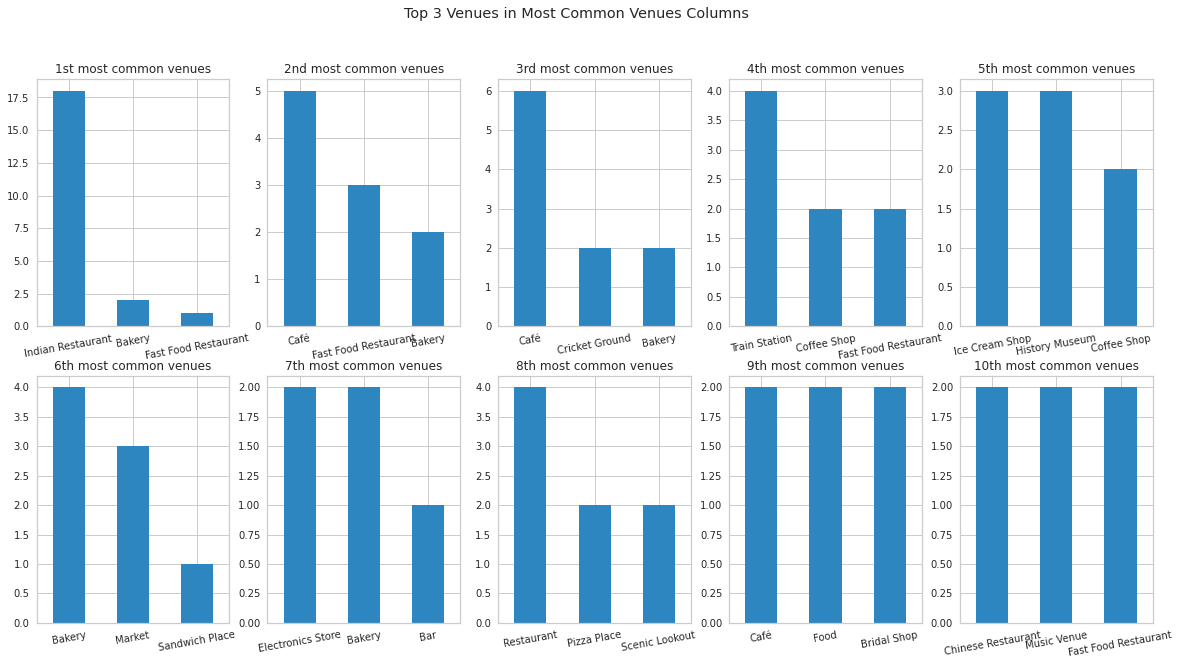

In [60]:
# Plot the bar graph for frequency of common venues in Cluster 1

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10)) # Specifying size and number of plots
x=0
y=0
fig.suptitle('Top 3 Venues in Most Common Venues Columns')

for i in range(10,20):
    
    try:
        cluster1.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[0]).set_title('{}{} most common venues'.format((i-9),indicators[i-10]))
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    except:
        cluster1.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[0]).set_title('{}{} most common venues'.format((i-9),'th'))            
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    if (y!=4):
        y=y+1
    else:
        x=x+1
        y=0

In [61]:
# Print the neighborhood and their details, belonging to Cluster 2
cluster2 = final_df.loc[final_df['Cluster Labels'] == 1, final_df.columns[[1] + list(range(2, final_df.shape[1]))]]
cluster2

,Neighborhood,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Sahar,19.098889,72.867222,5,34,9,16,100,61,2,Coffee Shop,Indian Restaurant,Lounge,Hotel,Café,Fast Food Restaurant,Airport Service,Bar,Beer Garden,Italian Restaurant
33,Virar,19.470000,72.800000,2,18,0,4,64,11,0,Fast Food Restaurant,Pizza Place,Indian Chinese Restaurant,Indian Restaurant,Department Store,Theme Park,Afghan Restaurant,Music Venue,Modern European Restaurant,Monument / Landmark
44,Indian Institute of Technology Bombay campus,19.133636,72.915358,5,41,4,19,100,46,5,Indian Restaurant,Concert Hall,Café,Dance Studio,Food Court,Coffee Shop,Asian Restaurant,Building,Lake,Event Space
49,Mankhurd,19.050000,72.930000,9,93,12,19,100,22,0,Coffee Shop,Train Station,Gym,Bus Station,Sports Bar,Afghan Restaurant,Music Store,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant
58,Cuffe Parade,18.910000,72.810000,1,21,3,31,71,66,1,Park,Basketball Court,Department Store,Asian Restaurant,Italian Restaurant,Beach,Afghan Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater
66,Mahalaxmi,18.983333,72.800000,4,3,1,11,100,26,0,Arcade,Afghan Restaurant,Music Venue,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant
68,Malabar Hill,18.950000,72.795000,2,22,2,29,80,40,1,Convenience Store,Ice Cream Shop,Fast Food Restaurant,Indian Restaurant,Coffee Shop,Park,Food Truck,Dessert Shop,Lighthouse,Afghan Restaurant
75,Walkeshwar,18.947596,72.795957,2,20,2,28,76,37,1,Indian Restaurant,Hotel,Lighthouse,Fast Food Restaurant,Ice Cream Shop,Convenience Store,Coffee Shop,Gym,Food Truck,Dessert Shop


In [62]:
# Create Map for Cluster 2 neighborhoods
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to the map
for lat, lon, poi in zip(cluster2['Latitude'], cluster2['Longitude'], cluster2['Neighborhood']):
    
    label = folium.Popup(str(poi) + ' ,Cluster 2', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[1],
        fill_opacity=0.85).add_to(map_clusters)

# Display map
map_clusters

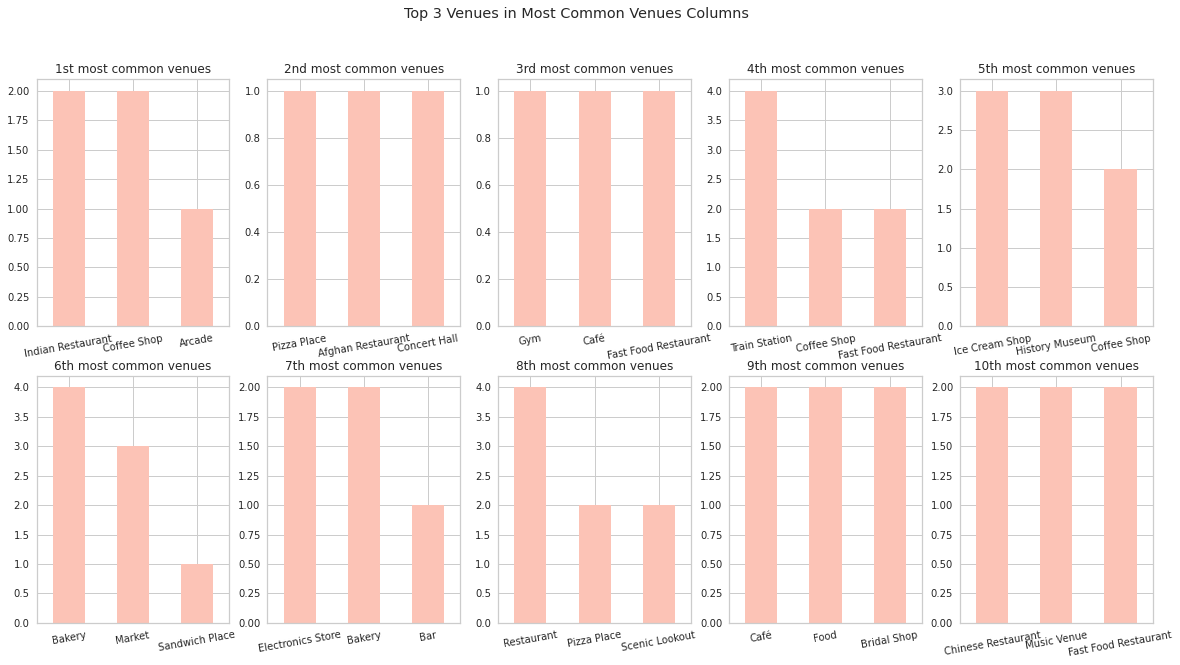

In [63]:
# Plot the bar graph for frequency of common venues in Cluster 2
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
x=0
y=0
fig.suptitle('Top 3 Venues in Most Common Venues Columns')
for i in range(10,20):
    try:
        cluster2.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[1]).set_title('{}{} most common venues'.format((i-9),indicators[i-10]))
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    except:
        cluster1.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[1]).set_title('{}{} most common venues'.format((i-9),'th'))            
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    if (y!=4):
        y=y+1
    else:
        x=x+1
        y=0

In [64]:
# Print the neighborhood and their details, belonging to Cluster 3
cluster3 = final_df.loc[final_df['Cluster Labels'] == 2, final_df.columns[[1] + list(range(2, final_df.shape[1]))]]
cluster3

,Neighborhood,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Marol,19.119219,72.882743,14,54,9,27,100,100,1,Indian Restaurant,Hotel,Convenience Store,Bakery,Ice Cream Shop,Diner,Coffee Shop,Chinese Restaurant,Restaurant,Farmers Market
7,Seven Bungalows,19.129052,72.817018,13,55,2,50,100,90,1,Café,Ice Cream Shop,Pub,Seafood Restaurant,Indian Restaurant,Juice Bar,South Indian Restaurant,Bistro,Beach,Recreation Center
8,Versova,19.120000,72.820000,7,51,6,38,100,81,7,Indian Restaurant,Café,Multiplex,Diner,Pub,Chinese Restaurant,Beach,North Indian Restaurant,Fish Market,Pizza Place
10,Bhayandar,19.290000,72.850000,32,66,4,21,100,71,5,Indian Restaurant,Fast Food Restaurant,Mexican Restaurant,Light Rail Station,Coffee Shop,Electronics Store,Restaurant,Burger Joint,Shop & Service,Food Truck
13,Kherwadi,19.055300,72.831400,14,73,12,59,100,100,26,Bakery,Indian Restaurant,Café,Snack Place,Deli / Bodega,Gourmet Shop,Pizza Place,French Restaurant,German Restaurant,Lounge
19,Bangur Nagar,19.167362,72.832252,14,54,6,35,100,76,7,Clothing Store,Multiplex,Coffee Shop,Indian Restaurant,Smoke Shop,Fast Food Restaurant,Department Store,Shopping Mall,Seafood Restaurant,Sandwich Place
21,Juhu,19.100000,72.830000,9,71,8,39,100,100,7,Bar,Hotel,Indian Restaurant,Nightclub,Café,Seafood Restaurant,Spa,Lounge,Ice Cream Shop,Beach
25,Thakur village,19.210206,72.872980,22,68,5,43,100,100,14,Pizza Place,Indian Restaurant,Lounge,Neighborhood,Ice Cream Shop,Fast Food Restaurant,Café,Restaurant,General Entertainment,Residential Building (Apartment / Condo)
28,Dindoshi,19.176382,72.864891,16,80,10,31,100,93,5,Fast Food Restaurant,Indian Restaurant,Donut Shop,Coffee Shop,Vegetarian / Vegan Restaurant,Multiplex,Bar,Breakfast Spot,Clothing Store,Sandwich Place
35,Vile Parle,19.100000,72.830000,9,71,8,39,100,100,7,Bar,Hotel,Indian Restaurant,Nightclub,Café,Seafood Restaurant,Spa,Lounge,Ice Cream Shop,Beach


In [65]:
# Create Map for Cluster 2 neighborhoods
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to the map
for lat, lon, poi in zip(cluster3['Latitude'], cluster3['Longitude'], cluster3['Neighborhood']):
    
    label = folium.Popup(str(poi) + ' ,Cluster 3', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[2],
        fill_opacity=0.85).add_to(map_clusters)
# Display map
map_clusters

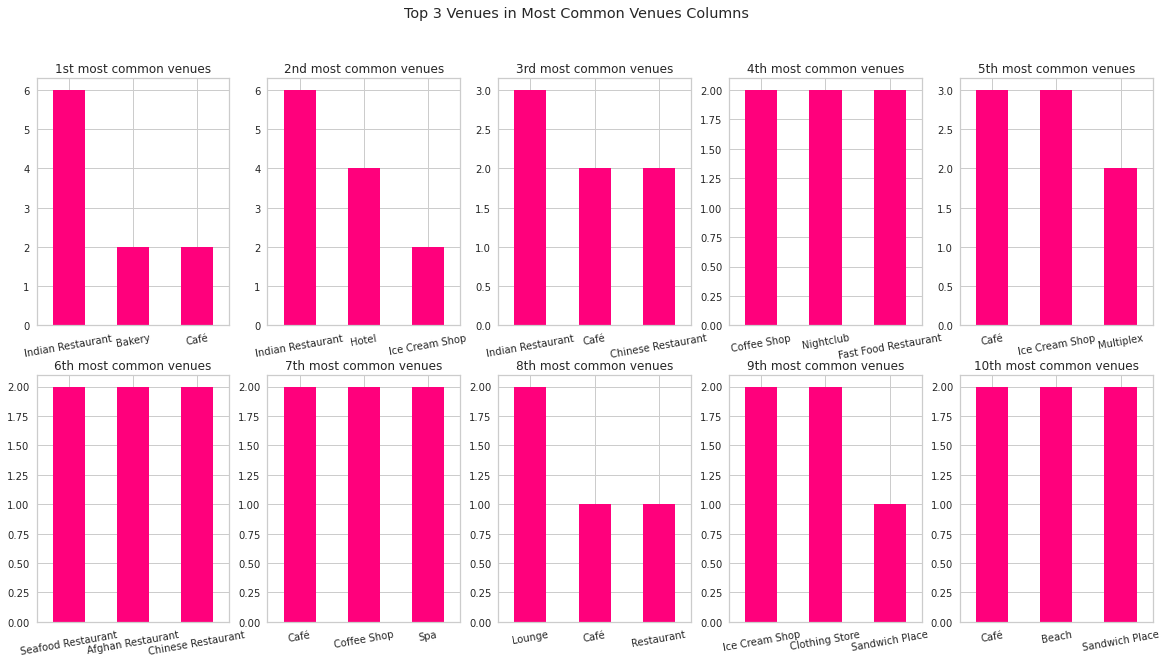

In [66]:
# Plot the bar graph for frequency of common venues in Cluster 3
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
x=0
y=0
fig.suptitle('Top 3 Venues in Most Common Venues Columns')
for i in range(10,20):
    try:
        cluster3.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[2]).set_title('{}{} most common venues'.format((i-9),indicators[i-10]))
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    except:
        cluster3.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[2]).set_title('{}{} most common venues'.format((i-9),'th'))            
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    if (y!=4):
        y=y+1
    else:
        x=x+1
        y=0

In [67]:
# Print the neighborhood and their details, belonging to Cluster 4
cluster4 = final_df.loc[final_df['Cluster Labels'] == 3, final_df.columns[[1] + list(range(2, final_df.shape[1]))]]
cluster4

,Neighborhood,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,19.129300,72.843400,30,100,13,58,100,100,15,Indian Restaurant,Bar,Pizza Place,Asian Restaurant,Pub,Chinese Restaurant,Bowling Alley,Burger Joint,Mughlai Restaurant,Snack Place
1,"Chakala, Andheri",19.111388,72.860833,16,87,10,39,100,100,10,Hotel,Café,Seafood Restaurant,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant
2,D.N. Nagar,19.124085,72.831373,22,100,9,61,100,100,22,Bar,Pub,Pizza Place,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Café,Residential Building (Apartment / Condo),Lounge,Liquor Store,Coffee Shop
3,Four Bungalows,19.124714,72.827210,17,89,8,60,100,100,19,Pub,Café,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Gym / Fitness Center,Bar,Juice Bar,Chinese Restaurant,Residential Building (Apartment / Condo)
4,Lokhandwala,19.130815,72.829270,19,96,8,70,100,100,20,Pub,Italian Restaurant,Café,Multiplex,Lounge,Juice Bar,Bar,Pizza Place,Indian Restaurant,Women's Store
9,Mira Road,19.284167,72.871111,48,89,6,34,100,97,5,Ice Cream Shop,Indian Restaurant,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Multiplex,Fast Food Restaurant,Café,Snack Place,Dessert Shop
14,Pali Hill,19.068000,72.826000,11,87,7,52,100,100,12,Bakery,Cupcake Shop,Seafood Restaurant,Deli / Bodega,Indian Restaurant,Fast Food Restaurant,Scenic Lookout,Greek Restaurant,Ice Cream Shop,Salad Place
15,I.C. Colony,19.247039,72.849830,24,81,8,59,100,100,2,Indian Restaurant,Dessert Shop,Chinese Restaurant,Fast Food Restaurant,Bar,Tennis Court,Pizza Place,Pharmacy,Ice Cream Shop,Coffee Shop
17,Dahisar,19.250069,72.859347,35,100,11,67,100,100,4,Chinese Restaurant,Café,Indian Restaurant,Juice Bar,Bar,Bakery,Diner,Gym,Restaurant,Pizza Place
20,Jogeshwari West,19.120000,72.850000,21,100,14,44,100,100,7,Indian Restaurant,Fast Food Restaurant,Food Court,Shopping Mall,Pizza Place,Optical Shop,Electronics Store,Restaurant,Chinese Restaurant,Camera Store


In [68]:
# Create Map for Cluster 4 neighborhoods
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to the map
for lat, lon, poi in zip(cluster4['Latitude'], cluster4['Longitude'], cluster4['Neighborhood']):
    
    label = folium.Popup(str(poi) + ' ,Cluster 4', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[3],
        fill_opacity=0.85).add_to(map_clusters)
    
# Display map
map_clusters

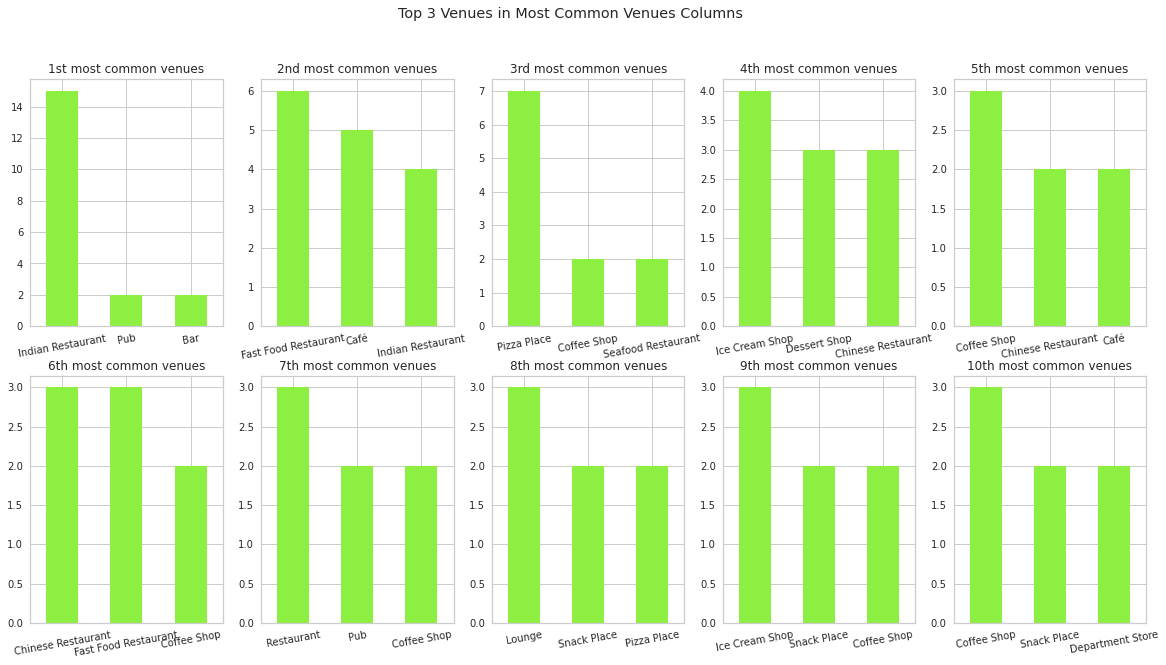

In [69]:
# Plot the bar graph for frequency of common venues in Cluster 4
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
x=0
y=0
fig.suptitle('Top 3 Venues in Most Common Venues Columns')
for i in range(10,20):
    try:
        cluster4.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[3]).set_title('{}{} most common venues'.format((i-9),indicators[i-10]))
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    except:
        cluster4.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[3]).set_title('{}{} most common venues'.format((i-9),'th'))            
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    if (y!=4):
        y=y+1
    else:
        x=x+1
        y=0

In [70]:
# Print the neighborhood and their details, belonging to Cluster 5
cluster5 = final_df.loc[final_df['Cluster Labels'] == 4, final_df.columns[[1] + list(range(2, final_df.shape[1]))]]
cluster5

,Neighborhood,Latitude,Longitude,Hospitals,Schools,Emergency Services,Leisure,Shopping Facilities,Banks,Cinemas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Uttan,19.280000,72.785000,3,5,0,9,0,5,0,Beach,Playground,Indian Restaurant,Bus Station,Resort,Neighborhood,Modern European Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant
12,Bandstand Promenade,19.042718,72.819132,2,7,2,19,41,29,4,Coffee Shop,Scenic Lookout,Beach,Café,Fast Food Restaurant,Lounge,Cocktail Bar,Boat or Ferry,Tea Room,Boutique
16,Gorai,19.250057,72.782021,0,1,1,3,1,1,0,Food,Seafood Restaurant,Indian Restaurant,Beach,Afghan Restaurant,Music Venue,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater
18,Aarey Milk Colony,19.148493,72.881756,1,4,1,6,10,1,0,Resort,Café,Hotel,Gym / Fitness Center,Indian Restaurant,Farm,Golf Course,Restaurant,Modern European Restaurant,Monument / Landmark
31,Naigaon,19.351467,72.846343,2,11,2,3,8,12,0,Platform,Cocktail Bar,Train Station,Chinese Restaurant,Neighborhood,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater
32,Nalasopara,19.415400,72.861300,4,18,1,3,38,13,0,Bus Station,Bar,Afghan Restaurant,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant,Multiplex
62,Dongri,19.283333,72.783333,3,5,0,7,0,5,0,Beach,Playground,Indian Restaurant,Bus Station,Resort,Neighborhood,Modern European Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant
79,Navy Nagar,18.901200,72.810100,1,15,3,15,18,19,1,Golf Course,Asian Restaurant,Beach,General Entertainment,Afghan Restaurant,Music Venue,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark


In [71]:
# Create Map for Cluster 5 neighborhoods
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to the map
markers_colors = []
for lat, lon, poi in zip(cluster5['Latitude'], cluster5['Longitude'], cluster5['Neighborhood']):
    
    label = folium.Popup(str(poi) + ' ,Cluster 5', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[4],
        fill_opacity=0.85).add_to(map_clusters)
    
# Display map
map_clusters

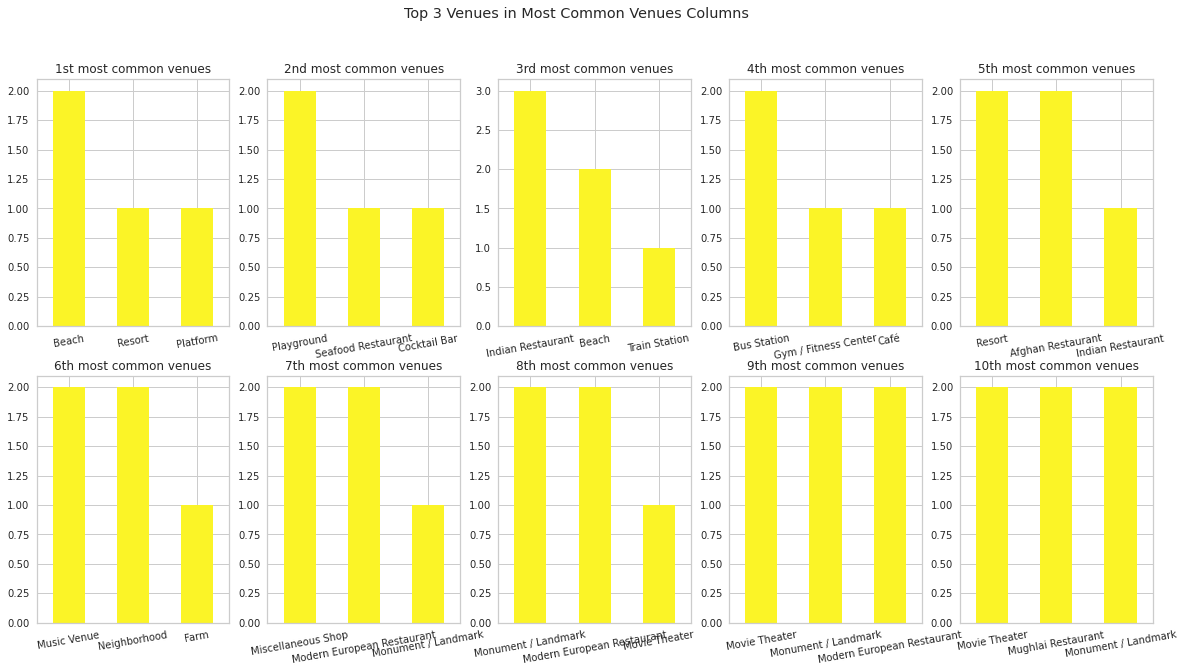

In [72]:
# Plot the bar graph for frequency of common venues in Cluster 5
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
x=0
y=0
fig.suptitle('Top 3 Venues in Most Common Venues Columns')
for i in range(10,20):
    try:
        cluster5.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[4]).set_title('{}{} most common venues'.format((i-9),indicators[i-10]))
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    except:
        cluster5.iloc[:,i].value_counts()[:3].plot(kind='bar',ax=axes[x,y], color=colors[4]).set_title('{}{} most common venues'.format((i-9),'th'))            
        plt.setp(axes[x][y].xaxis.get_majorticklabels(), rotation=10)
    if (y!=4):
        y=y+1
    else:
        x=x+1
        y=0

## For our final comparison we have plot the average value of the prices and facilities of different clusters against each other.

In [73]:
# Function to find the average value of 'name' category and plot a bar graph comparison
def comparing_clusters(final_df, name):
    
    category = []
    
    # Find mean of 'name' category in each of the cluster
    for i in range(0,5):
        category.append((final_df.loc[final_df['Cluster Labels'] == i])[name].mean())
        
    # Plot the bar chart for category 'name'
    
    fig, axes = plt.subplots(figsize=(7,7))
    
    # Create 7 cluster bars each with a height equal to the mean value of the facility
    bars = axes.bar(
        x=np.arange(1,6),
        height=category,
        color='#98cf3a'
    )
    
    fig.suptitle('Mean {} for different clusters'.format(name), fontsize=15,weight='bold')
    plt.xlabel('Cluster Numbers', fontsize=15)
    plt.ylabel('{}'.format(name), fontsize=15)
    
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    axes.set_axisbelow(True)
    axes.yaxis.grid(False)
    axes.xaxis.grid(False)
    
    # Write the precise value above each bar
    for bar in bars:
        axes.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + 0.3,
          round(bar.get_height(), 2),
          horizontalalignment='center',
          color='black',
          weight='bold'
        )
    fig.tight_layout()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


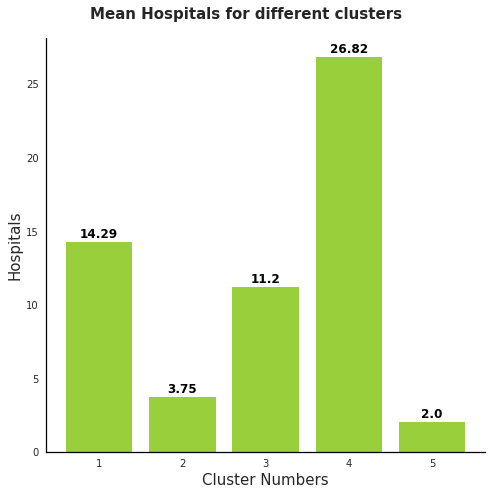

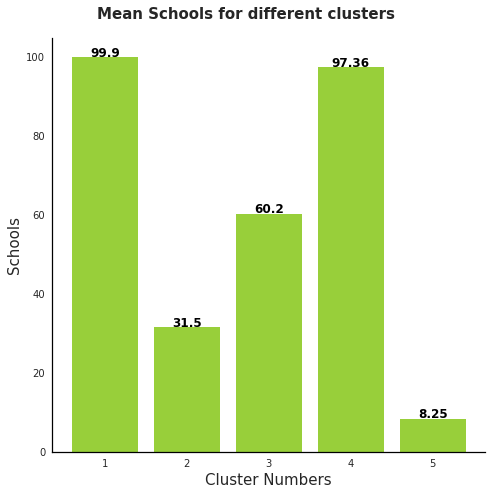

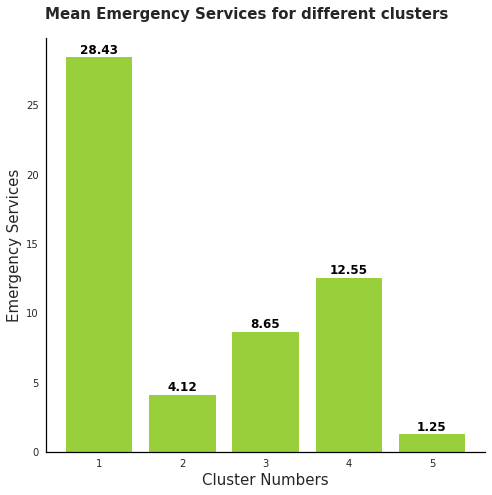

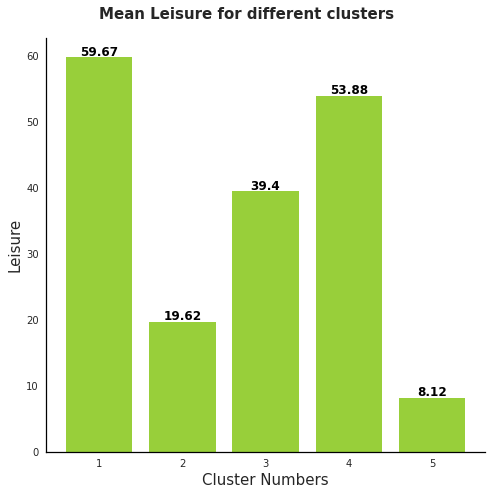

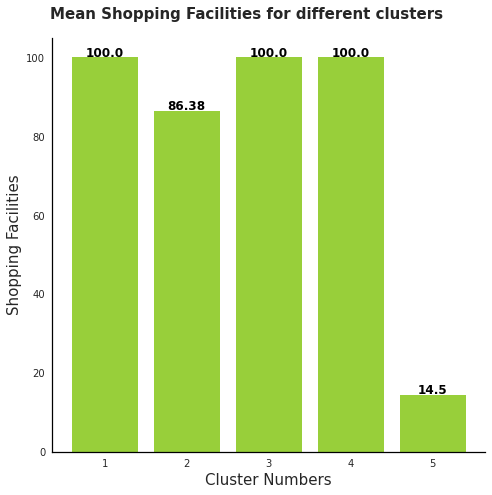

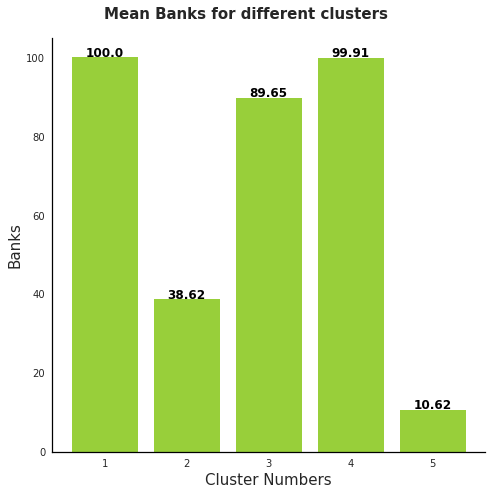

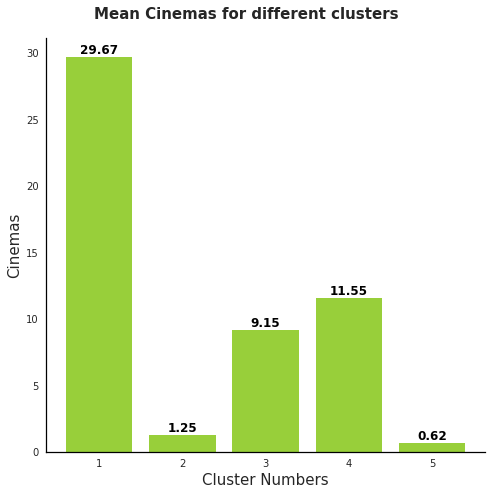

In [74]:
# Call the above function for all numerical values
for i in range(4,11):
    comparing_clusters(final_df, final_df.columns[i])